In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools
from utils import COLORS, color_coding
from pylab import rcParams

In [2]:
GRAPH_PATH_YO = './graphs/yo_2.graphml'
GRAPH_PATH_OTRO = './graphs/otro_2.graphml'
SOCIODEMOGRAPHIC_PATH = "./data/Sociodemographic_survey/answers_sociodemographic_survey.pkl"

In [3]:
G_yo = nx.read_graphml(GRAPH_PATH_YO)
G_otro = nx.read_graphml(GRAPH_PATH_OTRO)

## Graph Visualization

### Graph for "yo" answers

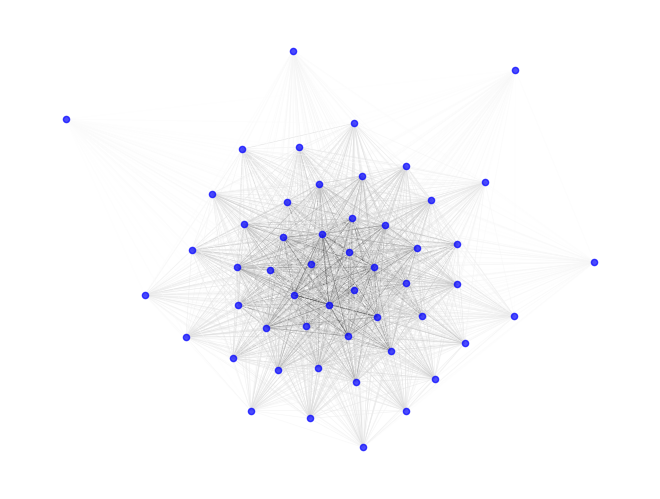

In [4]:
cmap = plt.cm.Greys # edge colors
nx.draw(G_yo, 
        pos= nx.spring_layout(G_yo, k=1, iterations=100), # try also nx.spectral_layout(G)
        edge_color=np.real([*nx.get_edge_attributes(G_yo, 'weight').values()]), 
        width=0.4, 
        edge_cmap=cmap, 
        node_color="blue",# this is the point where we can later plot one group red and the other blue
        alpha=0.7,
        node_size=20, 
        with_labels = False, 
        font_weight ="bold", 
        font_color="w")

Try coloring nodes by gender

In [5]:
df_sociodem = pd.read_pickle(SOCIODEMOGRAPHIC_PATH)

In [6]:
color_map = color_coding(G_yo, df_sociodem, sociodem_entry='genere',colors_dict=COLORS)
# color_map

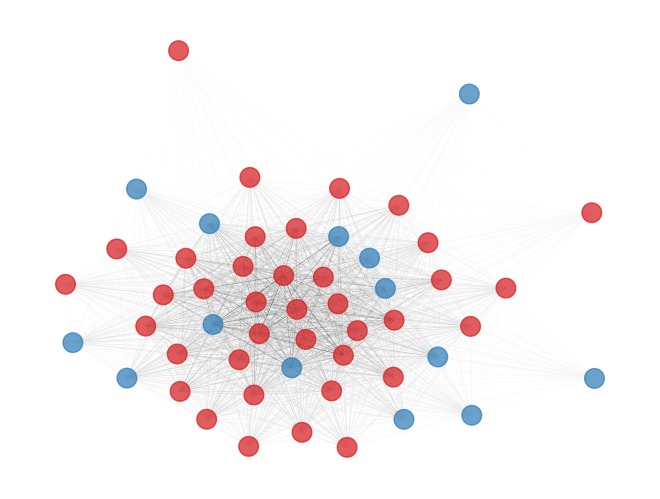

In [7]:
cmap = plt.cm.Greys 
nx.draw(G_yo, 
        pos= nx.spring_layout(G_yo, k=1, iterations=500),
        font_color="w",
        edge_color=np.real([*nx.get_edge_attributes(G_yo, 'weight').values()]), 
        width=0.3, 
        edge_cmap=cmap, 
        node_color=color_map, 
        alpha=0.7,
        node_size=200, 
        with_labels = False, 
        font_weight ="bold") 

### Graph for "otro" answers

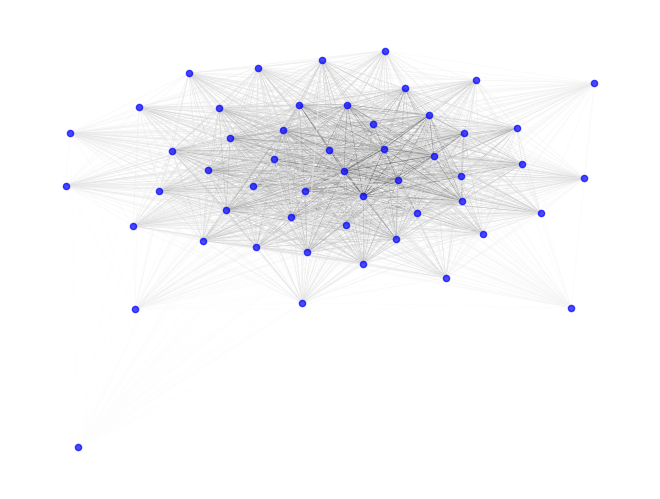

In [8]:
cmap = plt.cm.Greys # edge colors
nx.draw(G_otro, 
        pos= nx.spring_layout(G_otro, k=1, iterations=100), # try also nx.spectral_layout(G)
        edge_color=np.real([*nx.get_edge_attributes(G_otro, 'weight').values()]), 
        width=0.4, 
        edge_cmap=cmap, 
        node_color="blue",# this is the point where we can later plot one group red and the other blue
        alpha=0.7,
        node_size=20, 
        with_labels = False, 
        font_weight ="bold", 
        font_color="w")

In [9]:
color_map = color_coding(G_otro, df_sociodem, sociodem_entry='genere',colors_dict=COLORS)

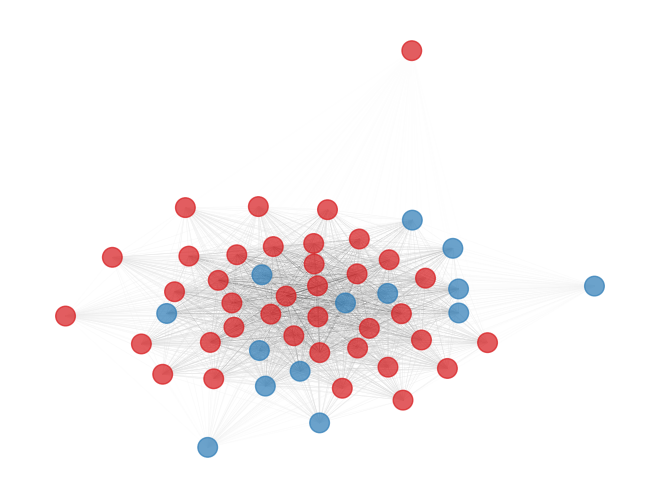

In [10]:
cmap = plt.cm.Greys 
nx.draw(G_otro, 
        pos= nx.spring_layout(G_otro, k=1, iterations=500),
        font_color="w",
        edge_color=np.real([*nx.get_edge_attributes(G_otro, 'weight').values()]), 
        width=0.3, 
        edge_cmap=cmap, 
        node_color=color_map, 
        alpha=0.7,
        node_size=200, 
        with_labels = False, 
        font_weight ="bold") 

## Graph analysis

### Node degrees

In [11]:
nodes_yo = G_yo.nodes()
edges_yo = G_yo.edges()
nodes_otro = G_otro.nodes()
edges_otro = G_otro.edges()
print(f'YO\n Number of nodes: {len(nodes_yo)} \n Number of edges: {len(edges_yo)}')
print(f'OTRO\n Number of nodes: {len(nodes_otro)}\n Number of edges: {len(edges_otro)}')

YO
 Number of nodes: 52 
 Number of edges: 1326
OTRO
 Number of nodes: 52
 Number of edges: 1326


In [12]:
weighted_edges_yo = nx.get_edge_attributes(G_yo, 'weight')
non_zero_edges_weights = [x for x in weighted_edges_yo.values() if x != 0]
print(f'Number of non zero edges for "yo" graph: {len(non_zero_edges_weights)}')

Number of non zero edges for "yo" graph: 1326


In [13]:
weighted_edges_yo = nx.get_edge_attributes(G_otro, 'weight')
non_zero_edges_weights = [x for x in weighted_edges_yo.values() if x != 0]
print(f'Number of non zero edges for "otro" graph: {len(non_zero_edges_weights)}')

Number of non zero edges for "otro" graph: 1326


Makes sense to not have any edge with weight 0, since we do the average of all stories and is unlikely to have a node not connected to any other node for all stories

#### Generate node degrees dS

In [14]:
k_yo = [x[1] for x in G_yo.degree(weight='weight')]
k_otro = [x[1] for x in G_otro.degree(weight='weight')]
k_yo_dS = pd.Series(k_yo)
k_otro_dS = pd.Series(k_otro)

### Quantiles computation

In [15]:
yo_25_quantile = k_yo_dS.quantile(q=0.25)
yo_75_quantile = k_yo_dS.quantile(q=0.75)
med_yo = k_yo_dS.median()
mean_yo = k_yo_dS.mean()

otro_25_quantile = k_otro_dS.quantile(q=0.25)
otro_75_quantile = k_otro_dS.quantile(q=0.75)
med_otro = k_otro_dS.median()
mean_otro = k_otro_dS.mean()

In [16]:
print(f'YO:\n\t25 quantile: {yo_25_quantile}\n\t75 quantile {yo_75_quantile}\n\tmedian {med_yo}\n\tmean {mean_yo}')
print(f'OTRO:\n\t25 quantile: {otro_25_quantile}\n\t75 quantile {otro_75_quantile}\n\tmedian {med_otro}\n\tmean {mean_otro}')

YO:
	25 quantile: 4.597435897435897
	75 quantile 9.081410256410255
	median 6.726923076923077
	mean 6.754437869822484
OTRO:
	25 quantile: 7.7487179487179505
	75 quantile 13.41730769230769
	median 10.875641025641027
	mean 10.639053254437869


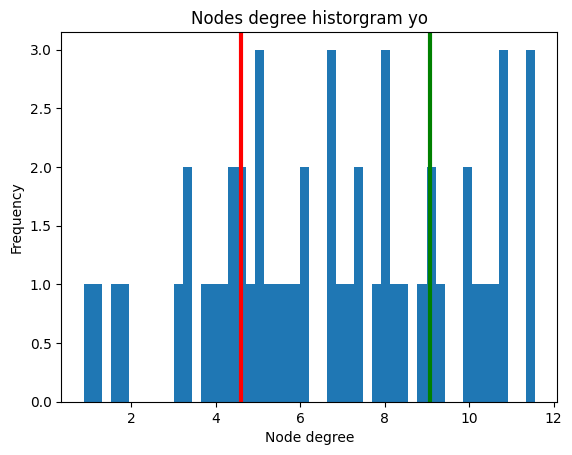

In [17]:
# We leave this commands to plot only one histogram in case that we need it in the future.
plt.xlabel('Node degree')
plt.ylabel('Frequency')
plt.title('Nodes degree historgram yo')
_ = plt.hist(k_yo_dS, bins=50, histtype='barstacked')
plt.axvline(yo_25_quantile, color='r', linestyle='-', linewidth=3)
plt.axvline(yo_75_quantile, color='g', linestyle='-', linewidth=3)
# plt.fill_betweenx(y=[0, 3], x1=yo_25_quantile, x2=yo_75_quantile, color='r', alpha=0.1)

### Plot distribution of nodes degrees together

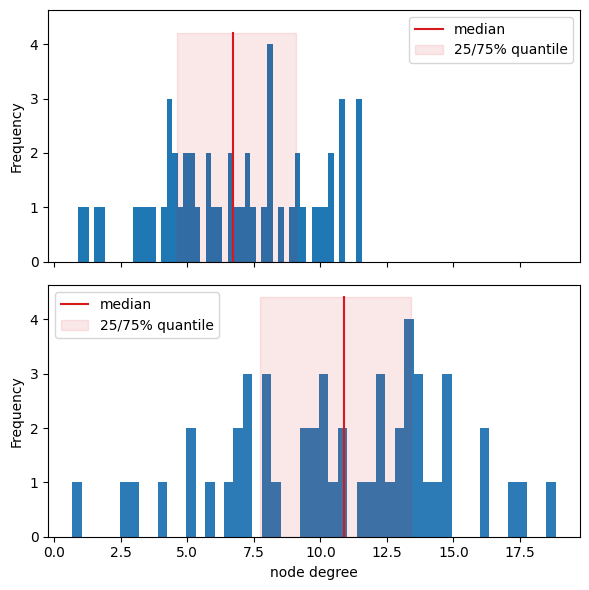

In [18]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True, figsize=(6, 6))
k_yo_dS.plot(ax=ax1, kind='hist', bins = 51, 
                  #title="hist: node degree yo", 
                  color="C0")
lim = ax1.get_ylim() # 2-array with y limits
ax1.plot([med_yo, med_yo], lim, color="#d7191c", label="median")
ax1.fill_betweenx(lim, yo_25_quantile, yo_75_quantile, color="#d7191c", alpha=0.1, label="25/75% quantile")

k_otro_dS.plot(ax=ax2, kind='hist', bins = 51, color="#2c7bb6",  
                    #title="hist: node degree otro"
                   )
lim = ax2.get_ylim() # 2-array with y limits
ax2.plot([med_otro, med_otro],   lim, color="#d7191c", label="median")
ax2.fill_betweenx(lim, otro_25_quantile, otro_75_quantile, color="#d7191c", alpha=0.1, label="25/75% quantile")
ax2.set_xlabel("node degree")

ax1.legend(loc="best"), ax2.legend(loc="best")
plt.tight_layout()
plt.savefig("img/node_degree_distribution_yo_otro.png")

plt.savefig("img/node_degree_distribution_yo_otro.pdf")
plt.show()


### Graph properties

#### Shortest path & Diameter

Shortest path with steps

In [20]:
shortest_paths_steps_yo = [nx.shortest_path(G_yo, source=x[0], target=x[1], weight='weight') for x in itertools.combinations(nodes_yo, 2)]
shortest_paths_steps_otro = [nx.shortest_path(G_otro, source=x[0], target=x[1], weight='weight') for x in itertools.combinations(nodes_otro, 2)]

In [21]:
shortest_paths_steps_yo = [len(x) for x in shortest_paths_steps_yo]
shortest_paths_steps_otro = [len(x) for x in shortest_paths_steps_otro]

In [22]:
diameter_steps_yo = max(shortest_paths_steps_yo) 
diameter_steps_otro = max(shortest_paths_steps_otro) 

In [23]:
print(f'STEPS DIAMETER:\n yo: {diameter_steps_yo}\n otro: {diameter_steps_otro}')

STEPS DIAMETER:
 yo: 4
 otro: 3


Shortest path with weights

In [24]:
shortest_paths_yo = [nx.shortest_path_length(G_yo, source=x[0], target=x[1], weight='weight') for x in itertools.combinations(nodes_yo, 2)]
shortest_paths_otro = [nx.shortest_path_length(G_otro, source=x[0], target=x[1], weight='weight') for x in itertools.combinations(nodes_otro, 2)]

In [25]:
diameter_yo = max(shortest_paths_yo) 
diameter_otro = max(shortest_paths_otro) 

In [26]:
print(f'DIAMETER:\n yo: {diameter_yo}\n otro: {diameter_otro}')

DIAMETER:
 yo: 0.05384615384615385
 otro: 0.035897435897435895


### Assortativity

In [36]:
deg_assort =nx.degree_assortativity_coefficient(G_yo, weight="weight")  # result: -0.019607843137252785
attr_assort = nx.attribute_assortativity_coefficient(G_yo, "age_bracket")     # result: -0.01960784313725481
print(f'Degree assortativity: {deg_assort}\nAttribute assortativity: {attr_assort}') 

Degree assortativity: -0.019607843137252785
Attribute assortativity: -0.01960784313725507


In [38]:
a = nx.degree_pearson_correlation_coefficient(G_yo, weight="weight")
a

-0.01960784313725488

In [42]:
nodes_lst = ['4e53c5c', 'aa07d95', 'bd4b2f4']
b = nx.degree_assortativity_coefficient(G_yo, weight="weight", nodes=nodes_lst) 
c = nx.attribute_assortativity_coefficient(G_yo, "age_bracket", nodes=nodes_lst)
print(f'a: {a}\nb: {b}')

a: -0.01960784313725488
b: -0.49999999999999617


In [35]:
attributes = nx.get_node_attributes(G_yo, 'age_bracket')
attributes

{'4e53c5c': 'old',
 'bd4b2f4': 'young',
 'aa07d95': 'old',
 'db7d9c3': 'old',
 '6bac72b': 'old',
 '962a7dd': 'old',
 '446ad6c': 'old',
 '693ef79': 'young',
 '8ec15bc': 'young',
 '41f2447': 'old',
 '34d8485': 'old',
 '49db8c4': 'old',
 'c4bba29': 'young',
 '1a8e45b': 'old',
 '6e93efd': 'young',
 'c94e42e': 'old',
 '7a35b75': 'old',
 '6568ea1': 'old',
 '2f5762a': 'old',
 '62447b9': 'old',
 '2541155': 'old',
 '7b3c431': 'old',
 '52d61f6': 'young',
 'd91bf84': 'old',
 '8c74aa5': 'young',
 'ac6f3f6': 'old',
 '2dffb9e': 'old',
 '7636563': 'old',
 'c899adb': 'old',
 '1117a63': 'old',
 '7d9c3_1': 'old',
 'fc2538d': 'young',
 'bf983ba': 'young',
 '79868cd': 'young',
 '20f3e2e': 'young',
 '99775ba': 'young',
 '619e952': 'old',
 'ea8c0d6': 'old',
 '374ecf8': 'old',
 'dee5269': 'old',
 '43c977d': 'old',
 '4c228f6': 'young',
 '844fef2': 'old',
 'e1b193b': 'young',
 'e98cdcd': 'old',
 '518e9b8': 'old',
 '1883ca0': 'old',
 '37b9a9f': 'young',
 'f9b9236': 'young',
 '7cf831f': 'old',
 '152aa4d': 'young